In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree
#...

## Loading the datasets

In [2]:
# Loading the main dataset and print it
dataset = pd.read_csv('./arabic_dataset.csv', delimiter=";", index_col=0)
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Loading the competition set and print it
competition = pd.read_csv('./competition.csv', delimiter=";", index_col=0)

In [4]:
competition
# You should see that there are no labels in this dataset. You'll have to predict them.
# So this dataset can not be used to fit any classifier, just to make predictions with classifiers that you designed

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


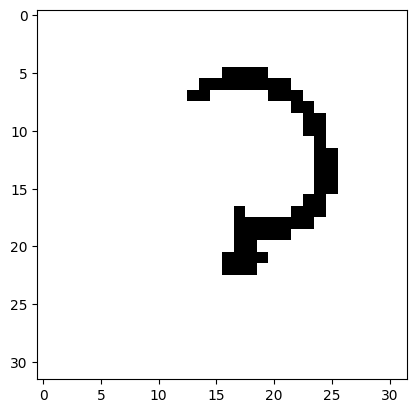

In [8]:
# Here you can see the image 0 of the dataset
idx = 0
plt.imshow(dataset.iloc[idx,1:].to_numpy().reshape(32,32),cmap = 'Greys')
# you can change the value of idx if you want to see another image

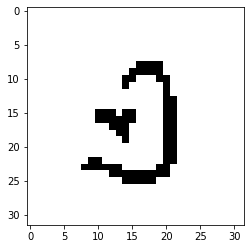

In [220]:
# Same with the image 0 of competition
idx = 0
plt.imshow(competition.iloc[idx,:].to_numpy().reshape(32,32),cmap = 'Greys')

# First guided submission to Kaggle

In [11]:
import random
pred = random.choices(np.unique(dataset.label), k=500)
pred
# pred is a vector with 500 random values from the set of possible label values 
# we will assume that these are our 500 predictions for the competition set

[22,
 2,
 12,
 1,
 22,
 1,
 18,
 12,
 6,
 22,
 2,
 12,
 1,
 2,
 2,
 16,
 1,
 2,
 2,
 2,
 16,
 22,
 1,
 16,
 22,
 1,
 6,
 16,
 16,
 6,
 1,
 22,
 18,
 1,
 12,
 12,
 1,
 18,
 6,
 22,
 2,
 12,
 1,
 2,
 18,
 12,
 16,
 16,
 18,
 2,
 12,
 22,
 2,
 2,
 12,
 16,
 22,
 2,
 2,
 6,
 18,
 12,
 6,
 6,
 16,
 16,
 12,
 18,
 2,
 12,
 1,
 1,
 1,
 22,
 18,
 2,
 22,
 6,
 22,
 2,
 18,
 12,
 18,
 12,
 2,
 1,
 1,
 1,
 18,
 1,
 2,
 18,
 16,
 18,
 16,
 1,
 6,
 18,
 2,
 18,
 18,
 12,
 22,
 12,
 1,
 16,
 6,
 12,
 16,
 1,
 2,
 6,
 6,
 1,
 22,
 1,
 6,
 12,
 2,
 16,
 1,
 18,
 1,
 1,
 16,
 18,
 16,
 18,
 2,
 6,
 18,
 18,
 12,
 2,
 16,
 1,
 18,
 1,
 2,
 22,
 1,
 6,
 22,
 12,
 12,
 1,
 22,
 18,
 2,
 12,
 2,
 16,
 12,
 6,
 12,
 22,
 2,
 12,
 1,
 12,
 22,
 12,
 16,
 16,
 6,
 18,
 22,
 12,
 12,
 18,
 16,
 16,
 18,
 6,
 12,
 1,
 2,
 16,
 1,
 12,
 22,
 6,
 22,
 18,
 12,
 22,
 12,
 12,
 22,
 16,
 1,
 12,
 22,
 6,
 1,
 18,
 22,
 18,
 1,
 6,
 22,
 2,
 6,
 6,
 2,
 2,
 2,
 12,
 1,
 18,
 22,
 1,
 2,
 18,
 12,
 2,
 2,
 16,
 16,
 

In [13]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,22
1,2,2
2,3,12
3,4,1
4,5,22
...,...,...
495,496,1
496,497,18
497,498,16
498,499,16


In [14]:
# then save it to a csv file
df.to_csv('myfirstsubmission.csv', index=False)
# You should now have a csv file on your working directory
# Go on Kaggle website, join the competition and drag this file into 'Submit predictions'. You should have a score
# This score might not be high because we have just done random predictions
# but when you'll design classifiers and make more clever predictions you will improve your score
# Later, when you'll have found an interesting classifier for each family, you have to predict the competition set
# with this classifier, put these predictions into a vector (like pred above) and apply the same procedure as
# in the previous cell

## Part 1 : preliminar analysis of the dataset

In [224]:
# TODO 

# Description et Analyse du jeu de données arabic_dataset.csv

## Le jeu de données contient 1700 images en noir et blanc de taille 32 fois32 qui representent les caractères de l'alphabet arabe. Nous avons donc au total 1700 ligne  et 32 fois 32=1025 colonnes qui représentent les 1025 pixels de chaque image. On ajoute à cela une colonne label ( la première colonne) qui correspond au caractère représenté par l'image. Dans ce jeu de données, il y'a sept caractères différents les labels (1,2,6,12,16,18, 22). 
### Le tableau ci-dessous représente la répartition des images pour chaque caractère de notre jeu de données.

### Ce tableau s'obtient avec la méthode value-Counts sur notre dataset

In [15]:
dataset.label.value_counts()

12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: label, dtype: int64

## Notre travail consiste à déterminer pour un caractère donné ( Ici il s'agir des images) sa classe d'appartenance ( 1,2,6,12,16,18, 22) . Pour cela nous allons utiliser plusieurs méthodes de classification afin de déterminer celle qui classe nos images avec moins d'erreurs. 
### Lors du training de nos modèles nous allons chercher celui qui faire le moins d'erreurs sur notre ensemble de Validation

## Part 2 : classifiers based on raw images

# Description précise de la méthodologie mise en oeuvre

### Decision trees

In [226]:
# TODO

# Principe : 
## Un arbre de décision est un outil d'aide à la décision qui permet de représenter sous forme 
## graphique un arbre de façon à faire apparaître l'extrémité de chaque branche les différents résultats possibles en fonction des décisions prises à chaque étape

# Fonctionnement:

## CP désigne la complexité minimale pour la construction de l’arbre maximal, le nombre minimal d’observation par nœud, le nombre de validations croisées, L’élagage a été fait La classification a été faite en variant le CP. Nous avons généralisé l’erreur en prenant le moins d’erreur avec la validation. Par la suite nous avons calculé la matrice de confusion pour voir les faux positifs et négatifs

### Afin de mener à bien notre étude nous allons séparer nos données en données de test  (30%), de validation  et de apprentissage . 

In [16]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [18]:
print(dataset.shape)
print(data_train.shape)
print(data_test.shape)
print(data_valid.shape)

(1700, 1025)
(1190, 1025)
(255, 1025)
(255, 1025)


## Plotting the training set

In [20]:
data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
248,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1507,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1291,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


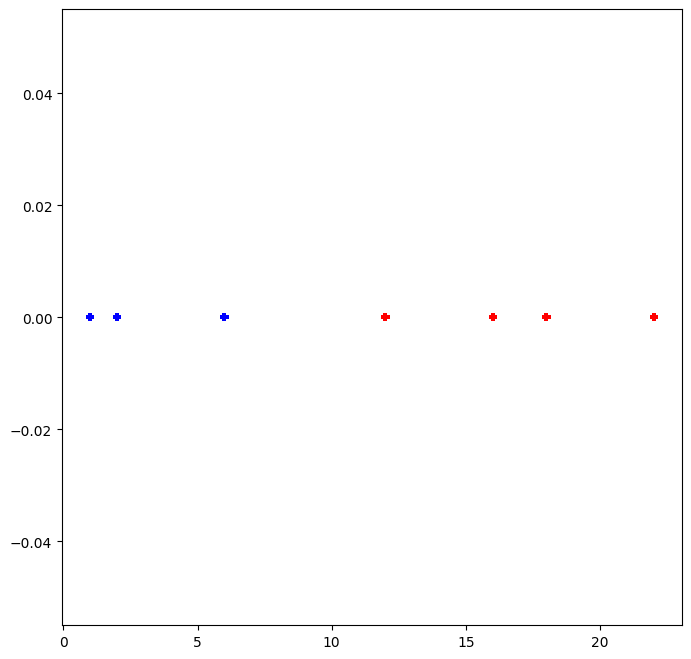

In [21]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.label, cmap = color_map, marker='+')


## Ajustement d'un arbre de décision¶

In [22]:
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,1:],data_train.label)

## Visualisation de l'arbre de l'arbre obtenu

[Text(0.8581302452033304, 0.9827586206896551, 'x[689] <= 0.5\ngini = 0.857\nsamples = 1190\nvalue = [157, 158, 184, 177, 168, 169, 177]'),
 Text(0.7606270995585941, 0.9482758620689655, 'x[486] <= 0.5\ngini = 0.85\nsamples = 934\nvalue = [151, 107, 176, 99, 94, 159, 148]'),
 Text(0.6854784593043869, 0.9137931034482759, 'x[754] <= 0.5\ngini = 0.849\nsamples = 851\nvalue = [98, 107, 166, 99, 88, 147, 146]'),
 Text(0.6050497615699159, 0.8793103448275862, 'x[783] <= 0.5\ngini = 0.838\nsamples = 711\nvalue = [95, 64, 164, 81, 57, 144, 106]'),
 Text(0.5513115870520942, 0.8448275862068966, 'x[626] <= 0.5\ngini = 0.82\nsamples = 611\nvalue = [94, 43, 163, 53, 42, 141, 75]'),
 Text(0.508503858608301, 0.8103448275862069, 'x[848] <= 0.5\ngini = 0.796\nsamples = 519\nvalue = [75, 40, 158, 38, 21, 135, 52]'),
 Text(0.47091714332986667, 0.7758620689655172, 'x[913] <= 0.5\ngini = 0.785\nsamples = 497\nvalue = [75, 34, 158, 37, 21, 135, 37]'),
 Text(0.41389630802685073, 0.7413793103448276, 'x[562] <= 0

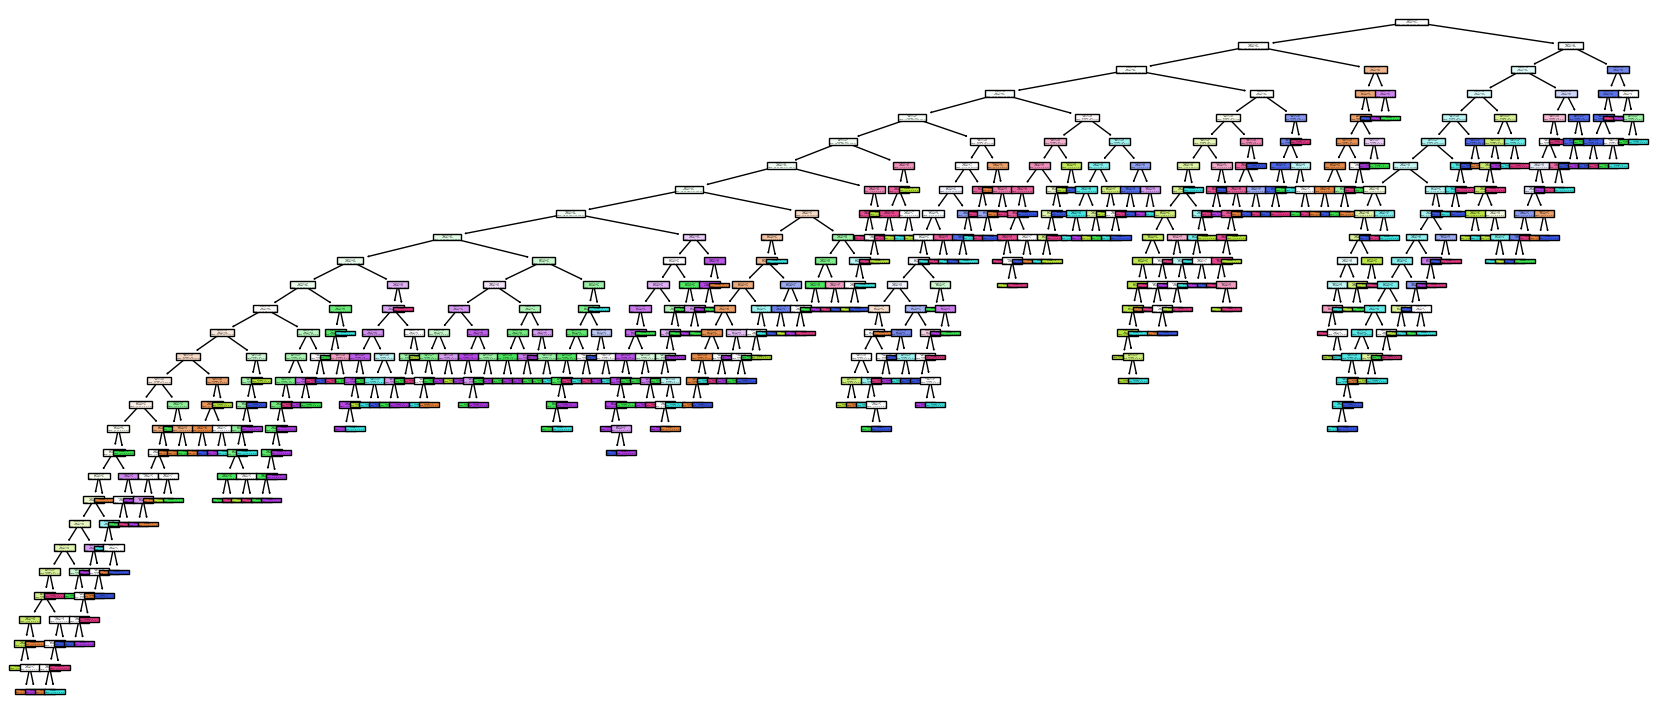

In [23]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)

In [24]:
#On peut obtenir automatiquement la prédiction de l'arbre pour tout exemple avec la commande 'predict' (comme pour la régression logistique) :
dt.predict(data_train.iloc[:,1:])
# ici je demande de prédire le premier exemple de la série de train, il faut donner ses caractéristiques

array([ 6, 16, 16, ..., 22,  6, 18], dtype=int64)

## En utilisant la commande 'score', je vais calculez le score de performance de cet arbre sur l'ensemble d'entraînement. 

In [25]:
dt.predict(data_train.iloc[:,1:])[0] #  ici je demande de prédire le premier exemple de la série de train, il faut donner ses caractéristiques

6

In [26]:
# Score de performance de cet arbre sur l'ensemble de training
dt.score(data_train.iloc[:,1:], data_train.label) # le score toute les lignes du data_train et les colonnes de 0 à 2 c-a-d la variable Y exclu

1.0

In [27]:
dt.score(data_valid.iloc[:,1:], data_valid.label) # le score pour les données de validation

0.5176470588235295

## Elagage de l'arbre¶

In [237]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label) # then ask for all the possible values(Toutes les valeurs possibles) 
# of alpha to prune this tree (depends on the training set)
path

{'ccp_alphas': array([0.        , 0.00078031, 0.00078782, 0.00080032, 0.00081487,
        0.00081822, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.00130719, 0.00130719, 0.

Text(0, 0.5, 'total impurity of leaves')

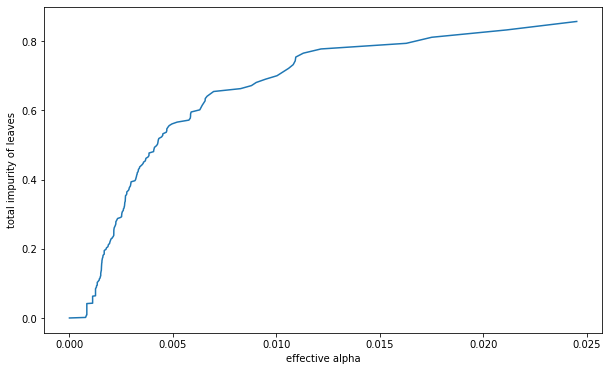

In [238]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [239]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,1:], data_train.label)
# Ici j'ai demandé la troisième valeur parmi toutes les alpha possibles (la première est 0, déjà fait avec l'arbre de base)
dt_pruned

DecisionTreeClassifier(ccp_alpha=0.0007878151260504202)

[Text(0.8546158619120028, 0.9827586206896551, 'X[689] <= 0.5\ngini = 0.857\nsamples = 1190\nvalue = [157, 158, 184, 177, 168, 169, 177]'),
 Text(0.7536978758149259, 0.9482758620689655, 'X[486] <= 0.5\ngini = 0.85\nsamples = 934\nvalue = [151, 107, 176, 99, 94, 159, 148]'),
 Text(0.6769786514690648, 0.9137931034482759, 'X[754] <= 0.5\ngini = 0.849\nsamples = 851\nvalue = [98, 107, 166, 99, 88, 147, 146]'),
 Text(0.5936243794537827, 0.8793103448275862, 'X[783] <= 0.5\ngini = 0.838\nsamples = 711\nvalue = [95, 64, 164, 81, 57, 144, 106]'),
 Text(0.5369129980071585, 0.8448275862068966, 'X[626] <= 0.5\ngini = 0.82\nsamples = 611\nvalue = [94, 43, 163, 53, 42, 141, 75]'),
 Text(0.4881833212767781, 0.8103448275862069, 'X[848] <= 0.5\ngini = 0.796\nsamples = 519\nvalue = [75, 40, 158, 38, 21, 135, 52]'),
 Text(0.45276879898976163, 0.7758620689655172, 'X[913] <= 0.5\ngini = 0.785\nsamples = 497\nvalue = [75, 34, 158, 37, 21, 135, 37]'),
 Text(0.4127730089319493, 0.7413793103448276, 'X[562] <= 0

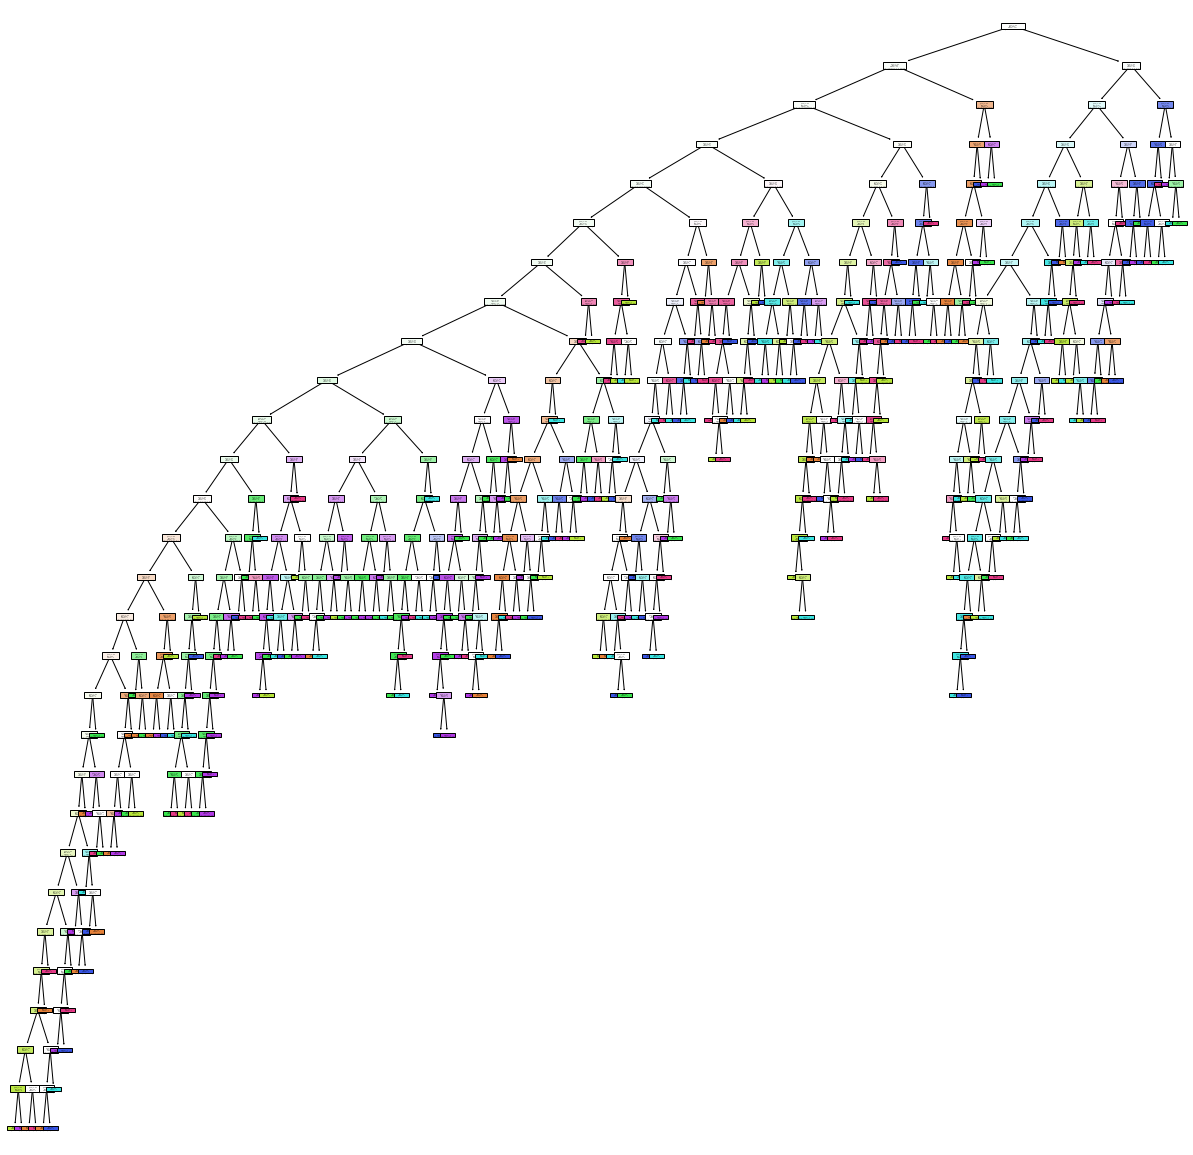

In [240]:
# Tracez l'arbre obtenu pour visualiser la différence avec celui obtenu précédemment 

plt.figure(figsize=(21, 21))
tree.plot_tree(dt_pruned, filled=True)

In [241]:
# Calculez sa performance sur l'ensemble de train et de validation

print(dt_pruned.score(data_train.iloc[:,1:], data_train.label))
print(dt_pruned.score(data_valid.iloc[:,1:], data_valid.label))

0.9983193277310924
0.5019607843137255


In [242]:
# Calculez sa performance(Score) sur l'ensemble de valid

dt_pruned.score(data_valid.iloc[:,1:], data_valid.label) # le score 

0.5019607843137255

 En utilisant une boucle for sur les valeurs de alpha (path.ccp_alphas), je vais calculer les scores de prédiction de tous les arbres élagués possibles sur l'ensemble de formation(training) et sur l'ensemble de validation 
 - Tracez sur un graphique ces scores VS alpha (2 courbes différentes). 

In [243]:
path.ccp_alphas.shape # valeurs de alpha

(249,)

In [244]:
# calculez les scores de prédiction de tous les arbres élagués possibles sur l'ensemble de (training) et de valid

score_train = []
score_valid = []
lr_models = {}

clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label) # then ask for all the possible values 


for i in path.ccp_alphas:
    alpha = tree.DecisionTreeClassifier(ccp_alpha=i).fit(data_train.iloc[:,1:], data_train.label)
    
    score_train.append(alpha.score(data_train.iloc[:,1:], data_train.label))
    score_valid.append(alpha.score(data_valid.iloc[:,1:], data_valid.label))
    

In [245]:
print(score_train) # les scores sur les données de train
print(score_valid) # les score sur les données de validation

[1.0, 0.9991596638655462, 0.9983193277310924, 0.9974789915966387, 0.9966386554621849, 0.9957983193277311, 0.9647058823529412, 0.9630252100840336, 0.9621848739495799, 0.9630252100840336, 0.9630252100840336, 0.9621848739495799, 0.9621848739495799, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9647058823529412, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9647058823529412, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9647058823529412, 0.9647058823529412, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9621848739495799, 0.9647058823529412, 0.9647058823529412, 0.9638655462184874, 0.9495798319327731, 0.9504201680672268, 0.946218487394958, 0.9504201680672268, 0.9470588235294117, 0.9453781512605042, 0.9495798319327731, 0.9478991596638655, 0.9495798319327731, 0.9470588235294117, 0.9478991596638655, 0.9478991596638655, 0.9495798319327731, 0.9504201680672

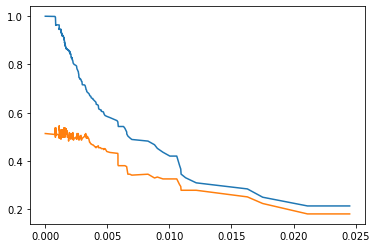

In [246]:
# Plot on a graph these scores VS alpha (2 different curves).
plt.plot(path.ccp_alphas, score_train)
plt.plot(path.ccp_alphas, score_valid)

In [247]:
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,1:],data_train.label)
dt

# l'arbre de Décision à l'ensemble de training 

DecisionTreeClassifier()

In [248]:
dt.score(data_valid.iloc[:,1:], data_valid.label) # score sur l'ensemble de validation

# Score sur l'ensemble de Valid 

0.5137254901960784

In [249]:
dt.score(data_train.iloc[:,1:], data_train.label)
# score sur l'ensemble de train
# j'ai un très bon score sur l'ensemble de traning

1.0

In [250]:
path.ccp_alphas.shape

(250,)

In [251]:
score_train = []
score_valid = []
lr_models = []

clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label) # then ask for all the possible values/tte les valeurs possibles


for i in path.ccp_alphas:
    alpha = tree.DecisionTreeClassifier(ccp_alpha=i).fit(data_train.iloc[:,1:], data_train.label)
   
    
   
    
    score_train.append(alpha.score(data_train.iloc[:,1:], data_train.label))
    score_valid.append(alpha.score(data_valid.iloc[:,1:], data_valid.label))
    
print('Score des données de training', score_train, end="\n\n\n\n\n")
print('Score des données de Valid', score_valid)

Score des données de training [1.0, 0.9991596638655462, 0.9983193277310924, 0.9974789915966387, 0.9966386554621849, 0.9957983193277311, 0.9630252100840336, 0.9621848739495799, 0.9647058823529412, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9630252100840336, 0.9647058823529412, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9621848739495799, 0.9630252100840336, 0.9638655462184874, 0.9647058823529412, 0.9621848739495799, 0.9647058823529412, 0.9630252100840336, 0.9621848739495799, 0.946218487394958, 0.9512605042016806, 0.9470588235294117, 0.9495798319327731, 0.9470588235294117, 0.9453781512605042, 0.9495798319327731, 0.9504201680672268, 0.9487394957983193, 0.9504201680672268, 0.946

In [252]:

print(max(score_train)) # le meilleur score sur ensemble de training
print(max(score_valid)) #  le meilleur score sur ensemble de validation

# plus on elarge plus l'arbre devient petit et mauvais

1.0
0.5411764705882353


In [253]:
print(score_valid.index(max(score_valid))) # l'index correspondant au meilleur score en validation
print(score_train.index(max(score_train))) # l'index correspondant au meilleur score en training

49
0


In [254]:
# l'estimation de l'erreur de généralisation de cet arbre 

dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[50]).fit(data_train.iloc[:,1:], data_train.label)
dt_pruned

DecisionTreeClassifier(ccp_alpha=0.0011204481792717086)

In [255]:
dt_pruned.score(data_test.iloc[:,1:], data_test.label) # Erreur de généralisation sur le dt_pruned

0.5411764705882353

In [256]:
dt_pruned.score(data_valid.iloc[:,1:], data_valid.label) 

0.5176470588235295

In [257]:
# Prédiction du modèle dt_pruned sur la dataset competition
dt1 = dt_pruned.predict(competition.iloc[:,:])

In [258]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = dt1
df
# Les données predicte 

,Id,label
0,1,22
1,2,16
2,3,12
3,4,16
4,5,16
...,...,...
495,496,2
496,497,16
497,498,18
498,499,22


In [259]:
df.to_csv('myfirstsubmission_decision_tree.csv', index=False)

## Après soummision de mes predictions sur Kaggle j'ai un score de 0.51 qui semble être très mauvais,  je vais continuer mon études avec un autre types de classifieurs

### SVM

In [260]:
# TODO

# Principe: 
### Les SVM sont également appelés « classifieurs à vaste marge » car leur objectif est de trouver l’hyperplan séparateur optimal qui maximise la marge entre les classes dans un espace de grande dimension. La marge est la distance entre la frontière de séparation et les échantillons les plus proches, ces derniers sont appelés vecteurs supports. Les SVM sont caractérisés par l’hyperplan séparateur optimal qui maximise la marge.

# Fonctionnement:
### Dans le fonctionnement des SVM on rencontre deux cas. Le premier cas les données sont linéairement séparables où il est possible de trouver facilement un classificateur linéaire. Le second cas les données sont non linéairement séparables. Dès lors on change de dimension appelée espace re-description. Cette transformation non linéaire est réalisée via une fonction noyau.Nous avons fait une estimation d'un modèle SVM sur les données d’apprentissage par variation de la constante de régulation C, ensuite introduction du noyau gaussien et polynomial.Nous avons etudier les deux cas possibles linéaire et non linéaire.


# SVM Linéaire 

In [261]:
dataset.label.value_counts() # Exemple pour chaque valeur de label

12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: label, dtype: int64

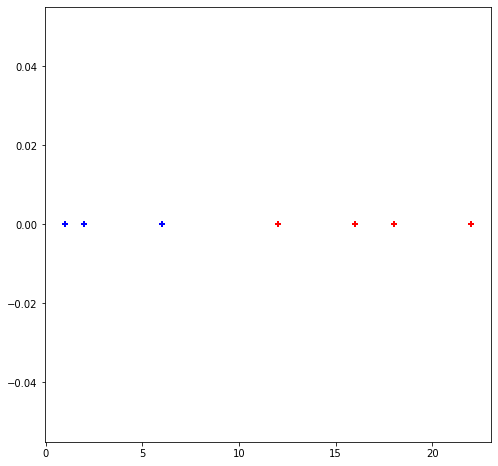

In [262]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.label, cmap = color_map, marker='+')

In [263]:
from sklearn import svm


### Après avoir varier les valeurs de C j'ai garger 0.01 qui semble être la plus approprié

In [264]:
model_svm = svm.SVC(C = 0.01, kernel = 'linear')

# ici SVC signifie Support Vector Classification (il existe d'autres types de SVM), et nous demandons un noyau linéaire.
# Le paramètre C est fixé à 0.01

In [265]:
model_svm.fit(dataset.iloc[:,1:], dataset.label)

# Ajuster le modèle en utilisant les caractéristiqueset la cible label

SVC(C=0.01, kernel='linear')

In [266]:
model_svm.support_vectors_

# les vecteurs de support trouvés par le SVC. 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [267]:
model_svm.support_

# l'index des vecteurs de support dans l'ensemble de données. 

array([   7,   14,   17, ..., 1673, 1675, 1697], dtype=int32)

In [268]:
model_svm.dual_coef_

# les coefficients de lagrange associés aux vecteurs de support (w1, w2 et w3)

array([[ 0.01      ,  0.        ,  0.00842909, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.01      ,  0.01      ,  0.        , ..., -0.        ,
        -0.01      , -0.        ],
       [ 0.01      ,  0.00619186,  0.01      , ..., -0.01      ,
        -0.        , -0.        ],
       [ 0.0083079 ,  0.01      ,  0.01      , ..., -0.        ,
        -0.01      , -0.00265034],
       [ 0.01      ,  0.01      ,  0.01      , ..., -0.        ,
        -0.00105681, -0.        ],
       [ 0.01      ,  0.01      ,  0.01      , ..., -0.01      ,
        -0.        , -0.        ]])

In [269]:
model_svm.intercept_

# les constantes du modèle (w0, ...)

array([ 0.29071799,  1.31584439,  1.0438777 ,  1.60074372,  1.44170772,
        1.23456046,  0.92133863,  1.73967755,  1.77706995,  1.07502576,
        1.60598725,  0.22027568,  0.98105395,  0.49802589,  0.64706578,
        0.98715638,  0.06795849,  0.13627234, -0.73859438, -0.99615898,
        0.33932315])

In [270]:
model_svm.decision_function(dataset.iloc[:,1:])

array([[-0.28602518,  4.18315858,  1.72970172, ...,  4.21647388,
         0.72206957,  4.23952072],
       [ 0.73062007, -0.25185872,  5.25782014, ...,  2.80185012,
         4.21362679,  6.28573901],
       [ 0.74256747, -0.30325555,  4.23144019, ...,  6.29259443,
         5.24786757,  3.20268769],
       ...,
       [-0.30112885,  0.69897156,  5.28967777, ...,  1.70696778,
         3.25590349,  6.30665976],
       [-0.30276502,  3.25090175,  1.71224419, ...,  5.26689277,
         0.71272534,  4.28938994],
       [-0.31199756,  0.70117646,  1.74231608, ...,  6.31412954,
         2.75850189,  5.29455642]])

In [271]:
model_svm.score(dataset.iloc[:,1:], dataset.label)
# pas mal comme prédiction 

0.82

In [272]:
model_svm.predict(dataset.iloc[:,1:])

array([12, 22, 16, ..., 22, 12, 16])

In [273]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [274]:
model_svm = svm.SVC(C = 0.01, kernel = 'linear').fit(data_train.iloc[:,1:], data_train.label)
print(model_svm.score(data_train.iloc[:,1:], data_train.label))
print(model_svm.score(data_valid.iloc[:,1:], data_valid.label))
print(model_svm.score(data_test.iloc[:,1:], data_test.label))

0.819327731092437
0.7372549019607844
0.7215686274509804


In [275]:
model_svm = svm.SVC(C = 0.01, kernel = 'linear').fit(data_train.iloc[:,1:], data_train.label)
print(model_svm.score(data_train.iloc[:,1:], data_train.label))
print(model_svm.score(data_valid.iloc[:,1:], data_valid.label))# score en validation
print(model_svm.score(data_test.iloc[:,1:], data_test.label))

0.819327731092437
0.7372549019607844
0.7215686274509804


In [276]:
svm_lineaire = model_svm.predict(competition.iloc[:,:])


In [277]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = svm_lineaire
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,18
498,499,22


In [278]:
df.to_csv('myfirstsubmission_svc_lineaire.csv', index=False)

### Un scrore de 0.73 meilleur que celui de l'arbre de décision, donc pour le moment on décide de garder le modèle SVM linéaire

## Polynomial

In [279]:
model_svm = svm.SVC(C = 0.01, kernel = 'poly')
# Aprè avoir essayer differents paramètre de C j'ai garder 0.01 qui est le bon pour continuer

In [280]:
model_svm.fit(dataset.iloc[:,1:], dataset.label)

SVC(C=0.01, kernel='poly')

In [281]:
model_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [282]:
model_svm.decision_function(dataset.iloc[:,1:])

array([[ 0.77184591,  1.77558343,  5.25917039, ..., -0.28010298,
         2.81540076,  4.20085088],
       [ 0.77200935,  1.77500052,  5.26090693, ..., -0.28026189,
         2.82577909,  4.21152533],
       [ 1.77165524,  0.7627575 ,  5.2582011 , ..., -0.26992865,
         2.81496716,  4.20373269],
       ...,
       [ 0.76117895,  1.7632795 ,  5.26156886, ..., -0.28234176,
         2.8429234 ,  4.24095792],
       [ 0.7679719 ,  1.77701264,  5.2571519 , ..., -0.27856075,
         2.81032492,  4.20176941],
       [ 0.7477567 ,  1.75223551,  5.24834158, ..., -0.23144972,
         2.78933901,  4.212191  ]])

In [283]:
model_svm.score(dataset.iloc[:,1:], dataset.label)


0.15

In [284]:
model_svm.predict(dataset.iloc[:,1:])

array([12, 12, 12, ..., 12, 12, 12])

In [285]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [286]:
model_svm = svm.SVC(C = 0.01, kernel = 'poly').fit(data_train.iloc[:,1:], data_train.label)
print(model_svm.score(data_train.iloc[:,1:], data_train.label))
print(model_svm.score(data_valid.iloc[:,1:], data_valid.label))
print(model_svm.score(data_test.iloc[:,1:], data_test.label))

0.1546218487394958
0.12156862745098039
0.13725490196078433


In [287]:
model_svm = svm.SVC(C = 0.01, kernel = 'poly', gamma = 10).fit(data_train.iloc[:,1:], data_train.label)
print(model_svm.score(data_train.iloc[:,1:], data_train.label))
print(model_svm.score(data_valid.iloc[:,1:], data_valid.label))
print(model_svm.score(data_test.iloc[:,1:], data_test.label))

1.0
0.7764705882352941
0.7803921568627451


In [288]:
svm_poly = model_svm.predict(competition.iloc[:,:])


In [289]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = svm_poly
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,2
497,498,1
498,499,22


In [290]:
df.to_csv('myfirstsubmission_svm_poly.csv', index=False)

### Un scrore de 0.77 mieux que celui du noyau linéaire, donc on garde celui-ci pour le moment(le svm de noyau poly)

## Gaussien

In [291]:
model_svm = svm.SVC(C = 0.01, kernel = 'rbf')

In [292]:
model_svm.fit(dataset.iloc[:,1:], dataset.label)

SVC(C=0.01)

In [293]:
model_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [294]:
model_svm.decision_function(dataset.iloc[:,1:])

array([[ 0.74979314,  1.76145782,  5.25835871, ..., -0.278499  ,
         2.9083137 ,  4.21266585],
       [ 0.7543019 ,  1.75373712,  5.26348456, ..., -0.27970039,
         2.97781404,  4.22272362],
       [ 1.7560064 ,  0.74738879,  5.2626854 , ..., -0.27676685,
         2.96830744,  4.21886232],
       ...,
       [ 0.74367076,  1.74774362,  5.26526076, ..., -0.27943947,
         3.04677596,  4.22913345],
       [ 0.74500783,  1.76631587,  5.25694083, ..., -0.27760469,
         2.89727727,  4.21779393],
       [ 0.7435778 ,  1.74830943,  5.26077677, ..., -0.27372569,
         2.95326194,  4.22610899]])

In [295]:
model_svm.score(dataset.iloc[:,1:], dataset.label)


0.15

In [296]:
model_svm.predict(dataset.iloc[:,1:])

array([12, 12, 12, ..., 12, 12, 12])

In [297]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [298]:
model_svm1 = svm.SVC(C = 0.01, kernel = 'rbf').fit(data_train.iloc[:,1:], data_train.label)
print(model_svm1.score(data_train.iloc[:,1:], data_train.label))
print(model_svm1.score(data_valid.iloc[:,1:], data_valid.label))
print(model_svm1.score(data_test.iloc[:,1:], data_test.label))

0.1546218487394958
0.12156862745098039
0.13725490196078433


In [299]:
svm_rbf = model_svm1.predict(competition.iloc[:,:])

In [300]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = svm_rbf
df

,Id,label
0,1,6
1,2,6
2,3,6
3,4,6
4,5,6
...,...,...
495,496,6
496,497,6
497,498,6
498,499,6


In [301]:
df.to_csv('myfirstsubmission_svm_poly.csv', index=False)

### Un scrore de 0.12 très faible, on garde celui du modèle poly qui à un bon score jusque là

### K-nearest-neighbour

In [302]:
# TODO

## Principe

In [303]:
from sklearn.neighbors import KNeighborsClassifier
n_n = KNeighborsClassifier(n_neighbors=1) # this initializes a knn for k = 1
n_n.fit(data_train.iloc[:,1:],data_train.label)

KNeighborsClassifier(n_neighbors=1)

In [304]:
n_n.score(data_train.iloc[0:2,1:], data_train.iloc[0:2,0]) # le score des données de train
print(n_n.score(data_valid.iloc[:,1:], data_valid.label)) # scrore sur la validation
print(n_n.score(data_test.iloc[:,1:], data_test.label))

0.7490196078431373
0.7294117647058823


In [305]:
# ici on faire une boucle for pour selectionner la meilleure valeurt de "k"
from sklearn import neighbors
errors = []
for k in range(2,30):
    knn = neighbors.KNeighborsClassifier(k) # initialisation a knn pour k=2
    errors.append(knn.fit(data_train.iloc[:,1:],data_train.label).score(data_valid.iloc[:,1:], data_valid.label))
    print(errors)


[0.6470588235294118]
[0.6470588235294118, 0.6823529411764706]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078, 0.6352941176470588]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078, 0.6352941176470588, 0.6392156862745098]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078, 0.6352941176470588, 0.6392156862745098, 0.6549019607843137]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.63921568

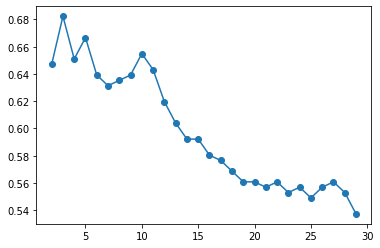

In [306]:
plt.plot(range(2,30), errors, 'o-')
plt.show() # pour K = 5 le plus approprié

In [307]:
n_n1 = KNeighborsClassifier(n_neighbors=5) # Après avoir identifier le K le plus approprié nous allons refaire 
n_n1.fit(data_train.iloc[:,1:],data_train.label)

KNeighborsClassifier()

In [308]:
# ici je demande de prédire le premier exemple de la série de train, il faut donner ses caractéristiques
pr = n_n1.predict(data_train.iloc[0:2,1:])
pr
pred_all = n_n1.predict(data_train.iloc[:,1:]) # predire sur l"ensemble de notre dataset
pred_all

array([ 6, 16,  6, ..., 22,  6, 18])

In [309]:
n_n1.score(data_valid.iloc[:,1:], data_valid.label)
print(n_n1.score(data_test.iloc[:,1:], data_test.label)) # Erreur de généralisation sur le model n_n1
print(n_n1.score(data_valid.iloc[:,1:], data_valid.label))

0.6627450980392157
0.6666666666666666


In [310]:
knn = n_n1.predict(competition.iloc[:,:])# la prédiction du nouveau model

In [311]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = knn
df

,Id,label
0,1,22
1,2,18
2,3,16
3,4,1
4,5,16
...,...,...
495,496,2
496,497,16
497,498,1
498,499,22


In [312]:
df.to_csv('myfirstsubmission_knn.csv', index=False)

### On remarque que le score est meilleur pour un k=1 

### Après soummision de mes predictions sur Kaggle j'ai un score de 0.61 qui est largement mieux que celui des arbres de décision. Mais le modèle svm du noyau poly reste le meilleur jusque là avec un score de 0.71.je vais continuer mons études avec un autre types de classifieurs

### Random forest

In [313]:
# TODO

## Principe

### Forêt d’arbres aléatoires appelée Random Forest est un algorithme de machine learning qui est particulièrement efficace pour repérer des liens entre une variable à expliquer et des variables explicatives. Random Forest va classer les variables explicatives en fonction de leurs liens avec la variable à expliquer.

## Fonctionement: 
 - La variation du nombre d’arbres(ntree)appliquée à la fonction random Forest va nous permettre de determiner le meilleur modèl

In [314]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [315]:
print(data_train.shape)
print(data_test.shape)
print(data_valid.shape)

(1190, 1025)
(255, 1025)
(255, 1025)


In [316]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
r_f = RandomForestClassifier(n_estimators=10) #ceci initialise une forêt aléatoire avec 10 arbres

r_f.fit(data_train.iloc[:,1:],data_train.label) 

RandomForestClassifier(n_estimators=10)

In [318]:
r_f.predict(data_train.iloc[0:2,1:])# les lignes de 0 à 2 et colonnes à partir des données de pixel

array([ 6, 16])

In [319]:
data_train.iloc[0:2,0]  # vérification de la données predire 

# Ici nous avons faire une bonne prédiction

248     6
436    16
Name: label, dtype: int64

In [320]:
r_f.score(data_train.iloc[:,1:], data_train.iloc[:,0]) # le score sur l'ensemble de training

0.9932773109243698

In [321]:
r_f.score(data_valid.iloc[:,1:], data_valid.iloc[:,0]) # le score sur l'ensemble de Valid

0.7137254901960784

### Avec 10 forêts aléatoire on constacte que le score s'ameliore largement mais pour plus de possibilités sur l'augmentation du score je vais essayer différentes valeurs de forêts aléatoire plus elevée et voir le score.

In [322]:
# Differentes forêts aléatoires (# nombres d'arbres)
#le moment de faire la bonne boucle for qui va bien
#la on va faire une boucle pour selectionner la meilleure valeur de i

from sklearn.ensemble import RandomForestClassifier
errors = []
for i in range(1,40):
    models = RandomForestClassifier(n_estimators=i) # valeur initaile de l'arbre est 1
    errors.append(models.fit(data_train.iloc[:,1:],data_train.label).score(data_test.iloc[:,1:], data_test.label))
    print(errors) # differente valeurs des erreur

[0.4588235294117647]
[0.4588235294117647, 0.48627450980392156]
[0.4588235294117647, 0.48627450980392156, 0.5215686274509804]
[0.4588235294117647, 0.48627450980392156, 0.5215686274509804, 0.5803921568627451]
[0.4588235294117647, 0.48627450980392156, 0.5215686274509804, 0.5803921568627451, 0.6039215686274509]
[0.4588235294117647, 0.48627450980392156, 0.5215686274509804, 0.5803921568627451, 0.6039215686274509, 0.6274509803921569]
[0.4588235294117647, 0.48627450980392156, 0.5215686274509804, 0.5803921568627451, 0.6039215686274509, 0.6274509803921569, 0.6745098039215687]
[0.4588235294117647, 0.48627450980392156, 0.5215686274509804, 0.5803921568627451, 0.6039215686274509, 0.6274509803921569, 0.6745098039215687, 0.6666666666666666]
[0.4588235294117647, 0.48627450980392156, 0.5215686274509804, 0.5803921568627451, 0.6039215686274509, 0.6274509803921569, 0.6745098039215687, 0.6666666666666666, 0.6549019607843137]
[0.4588235294117647, 0.48627450980392156, 0.5215686274509804, 0.5803921568627451, 0

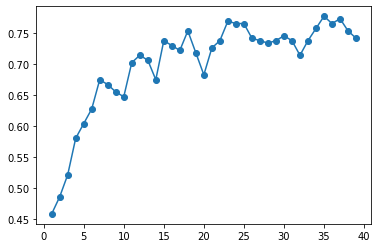

In [323]:
plt.plot(range(1,40), errors, 'o-') # affichage des erreurs 
plt.show() 

# L'arbre la plus adapté est celle qui a la plus petite valeurs (errors)

In [324]:
print(max(errors))  
errors.index(max(errors)) # il est à l'indice 5 c'est-adire pour un arbre de valeur = 16

0.7764705882352941


34

In [325]:
r_f1 = RandomForestClassifier(n_estimators=27) #  Ici nous avons pris 16 car elle est la meilleur
r_f1.fit(data_train.iloc[:,1:],data_train.label) 

RandomForestClassifier(n_estimators=27)

In [326]:
print(r_f1.score(data_valid.iloc[:,1:], data_valid.label))
print(r_f1.score(data_test.iloc[:,1:], data_test.label))
 # Erreur de généralisation s'applique sur l'ensemble de test

0.7333333333333333
0.7411764705882353


In [327]:
randon_foret = r_f1.predict(competition.iloc[:,:]) #la prédiction de notre jeu de données sur le model r_f1

In [328]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = randon_foret
df

,Id,label
0,1,22
1,2,1
2,3,16
3,4,16
4,5,16
...,...,...
495,496,2
496,497,16
497,498,18
498,499,22


In [329]:
df.to_csv('myfirstsubmission_randon_forest.csv', index=False)

### Après soummision de mes predictions sur Kaggle j'ai un score de 0.67 il reste le meilleur pour le moment je vais continuer avec les autres methodes 

### Logistic regression

In [330]:
# TODO

In [331]:
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
label = dataset['label']
distribut = label.value_counts()
distribut # les valeurs de la Variable cible label

12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: label, dtype: int64

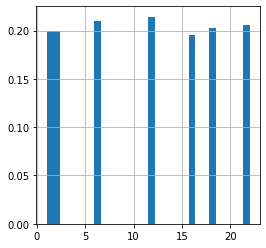

In [333]:
# pour voir la distribution des valeurs cibles, je vais utiliser la même méthode ci-dessus

dataset.label.hist(bins=30, figsize=(4,4), density=True)
plt.show()

In [334]:
# It is adviced to "standardize" the features before applying a logistic regression model. Santardize means
# transforming each feature so that the mean of each feature is 0 and the standard deviation 1.
# This can be done by the following commands
pixel_dataset = dataset.iloc[:,1:] # pixel_dataset contains the features
label_dataset = dataset.label # label_dataset contains the class
scaler = preprocessing.StandardScaler().fit(pixel_dataset) # Standard Scaler is the command to standardize
pixel_dataset = scaler.transform(pixel_dataset)
pixel_dataset = pd.DataFrame(pixel_dataset)
# Now the features are standardized inside the table pixel_dataset
data_dataset = pixel_dataset
data_dataset['label'] = label_dataset
# data_dataset contains the features (standardized) and the class (column 'label')

In [335]:
moyenne = np.mean(data_dataset.iloc[:,1:])
moyenne

1        0.000000e+00
2        0.000000e+00
3        0.000000e+00
4        0.000000e+00
5        0.000000e+00
             ...     
1020     0.000000e+00
1021    -6.269495e-18
1022     1.253899e-17
1023     6.269495e-18
label    1.101471e+01
Length: 1024, dtype: float64

In [336]:
# test = 30% reste 70% 
data_train, data_test = train_test_split( dataset, test_size=0.30, random_state=42)
data_valid, data_test = train_test_split(data_test, test_size=0.5, random_state=42)

In [337]:
print(data_train.shape)
print(data_valid.shape)
print(data_test.shape)

(1190, 1025)
(255, 1025)
(255, 1025)


## Fitting a logistic regression model

In [338]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression().fit(data_train.iloc[:,1:], data_train.label)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [339]:
# The constant of the model (theta_0 in the slides)
theta_0 = lr_model.intercept_
theta_0

array([ 6.95376882,  5.60417084, -0.3972968 , -2.37325941, -4.82934134,
       -1.83696743, -3.12107468])

In [ ]:
# The parameters associated to each feature

theta_1_2 = lr_model.coef_ # Coefficients des deux variables du data_train
theta_1_2

In [341]:
print(lr_model.score(data_train.iloc[:,1:], data_train.label))
print(lr_model.score(data_valid.iloc[:,1:], data_valid.label)) # la précision de ce modèle sur l'ensemble de validation.
print(lr_model.score(data_test.iloc[:,1:], data_test.label))

0.9983193277310924
0.6705882352941176
0.6313725490196078


In [342]:
logistic_regression = lr_model.predict(data_train.iloc[:,1:]) #la prédiction de notre jeu de données
logistic_regression

array([ 1,  6, 18, ...,  2, 16, 18])

In [343]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [ ]:
mc_model = LogisticRegression(multi_class='multinomial').fit(data_train.iloc[:,1:], data_train.label)
mc_model

In [ ]:
mc_model.predict_proba(data_train.iloc[:,1:]) # différentes probabilité pour les 7 sortir de la variable cible

In [346]:
print(mc_model.score(data_train.iloc[:,1:], data_train.label))
print(mc_model.score(data_valid.iloc[:,1:], data_valid.label))
print(mc_model.score(data_test.iloc[:,1:], data_test.label))

0.9983193277310924
0.6705882352941176
0.6313725490196078


In [ ]:
score = []
mc_model = {}

for i in range(1, 30):
    poly_i = PolynomialFeatures(degree = i)
    
    X_train_i = poly_i.fit_transform(data_train.iloc[:,0:2])
    X_valid_i = poly_i.fit_transform(data_valid.iloc[:,0:2])
    
    mc_model = LogisticRegression().fit(X_train_i, data_train.label)
    score.append(mc_model.score(X_valid_i, data_valid.label))
    

score # le score pour les différentes dégré

In [348]:
print(max(score))  
score.index(max(score))

1.0


0

In [ ]:
poly_i = PolynomialFeatures(degree = 1) # np.maximun pour avoir celui qui a le meuilleur score 
    
X_train_i = poly_i.fit_transform(data_train.iloc[:,1:])
X_valid_i = poly_i.fit_transform(data_valid.iloc[:,1:])
    
lr_models = LogisticRegression().fit(X_train_i, data_train.label)

In [350]:
X_test = poly_i.fit_transform(data_test.iloc[:,1:])
X_valid = poly_i.fit_transform(data_valid.iloc[:,1:])
print(lr_models.score(X_test, data_test.label))
print(lr_models.score(X_valid, data_valid.label))


0.6235294117647059
0.6784313725490196


In [351]:
logistic = lr_model.predict(competition.iloc[:,:]) #la prédiction de notre jeu de données du model lr_model

In [ ]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = logistic
df

In [353]:
df.to_csv('myfirstsubmission_logistic.csv', index=False)

### un score de 0.63 sur Kaggle

### Neural networks

In [354]:
# TODO

## Principe
Un neurone formel, ou neurone, est une fonction algébrique non linéaire et bornée, dont la valeur 
dépend de paramètres appelés coefficients ou poids. Les variables de cette fonction sont 
habituellement appelées « entrées » du neurone, et la valeur de la fonction est appelée « sortie »

## Fonctionnement
Dans notre cas nous avons transformé les classes de la variable cible label de 1/2/3 en 0/1/2. Par la suite 
nous avons créé un réseau de neurones. Nous avons modifié plusieurs paramètres à savoir le 
nombre d’epochs, la fonction d’activation, le nombre de couches cachées.

In [355]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


In [356]:
data_train, data_test = train_test_split(dataset.iloc[:,1:], test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [357]:
print(data_train.shape)
print(data_test.shape)
print(data_valid.shape)

(1190, 1024)
(255, 1024)
(255, 1024)


In [358]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,1:], label, test_size=0.5)

In [359]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(850, 1024)
(850, 1024)
(850,)
(850,)


In [ ]:
X_train

### - 
Comme la cible est ici multi-classes avec des valeurs possibles, le réseau que nous allons créer devrait avoir des sorties (correspondant à la probabilité qu'un exemple donné appartienne à chaque classe). Pour adapter un tel modèle, la forme de la cible doit être modifiée en un vecteur de taille 7 avec des zéros partout sauf à la position correspondant à la valeur de la classe où il devrait y avoir un 1. Mais les valeurs de la cible devraient commencer à 0 (ici elles commencent à 1).
Nous montrons ci-dessous comment y parvenir :

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1024)), # because 19 features / 19 features(Caractéristique)
  tf.keras.layers.Dense(13,activation='relu'),# 1st hidden layer, 13 neurons, sigmoid activation
  tf.keras.layers.Dense(10,activation='relu'),# 2nd hidden layer, 10 neurons, relu activation
  tf.keras.layers.Dense(8,activation='relu'),# 3rd hidden layer, 8 neurons, relu activation
  tf.keras.layers.Dense(7),
  tf.keras.layers.Activation('sigmoid'), # last layer with 7 outputs                                
])
model.summary()

In [362]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train__y_labels = label_as_binary.fit_transform(y_train)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# EarlyStopping is already implementing in keras. This is a "callback" structure
# Here, we monitor the "val_loss" and we stop the learning when this quantity
# has not reached its lowest value after 100 iterations
history = model.fit(X_train, train__y_labels, validation_split = 0.2, batch_size=100, epochs=500)

In [ ]:
# Plot curves of loss function, accuracy validation and loss on validation
plt.plot(history.history['loss'])
plt.title('Loss evolution')
plt.xlabel('epochs')
plt.ylabel('cross entropy')

plt.plot(history.history['accuracy'])
plt.title('Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [365]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
test__y_labels = label_as_binary.fit_transform(y_test)
test_X_labels = label_as_binary.fit_transform(X_test)

In [366]:
tt = tf.keras.utils.to_categorical(y_test)
ttt = tf.keras.utils.to_categorical(X_test)

In [ ]:
# note prediction : 
Y_pred = model.predict(X_test)
Y_pred

In [ ]:
NN = model.predict(competition) #la prédiction de notre jeu de données 
NN
y_classes = [np.argmax(pred, axis=None, out=None) for pred in NN]

In [ ]:
y_classes

In [ ]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = y_classes
df

In [371]:
df.to_csv('myfirstsubmission_NN.csv', index=False)

## Part 3 : using HOG representation

### Decision trees

In [372]:
# TODO

In [373]:
from skimage.feature import hog

In [374]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(4,4))))

In [375]:
data_train_hog, data_test_hog = train_test_split( dataset, test_size=0.30, random_state=42)
data_valid_hog, data_test_hog = train_test_split(data_test_hog, test_size=0.5, random_state=42)

In [376]:
print(data_train.shape)
print(data_valid.shape)
print(data_test.shape)

(1190, 1024)
(255, 1024)
(255, 1024)


In [ ]:
data_train_hog

In [378]:
hog_train = data_train_hog.apply(my_hog, axis=1, args=(2,4))
hog_valid= data_valid_hog.apply(my_hog, axis=1, args=(2,4))
hog_test = data_test_hog.apply(my_hog, axis=1, args=(2,4))
hog_train['label'] = data_train_hog.label
hog_valid['label'] = data_valid_hog.label
hog_test['label'] = data_test_hog.label

In [ ]:
hog_train

In [380]:
dt_hog = tree.DecisionTreeClassifier().fit(hog_train.iloc[:,0:31],data_train_hog.label)
dt_hog

DecisionTreeClassifier()

In [381]:
dt_hog.score(data_train_hog.iloc[:,0:31], data_train_hog.label) 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.13361344537815126

In [382]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path2 = clf.cost_complexity_pruning_path(hog_train.iloc[:,:800], hog_train.label) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
dt3_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[47]).fit(hog_train.iloc[:,:800], hog_train.label)

In [383]:
dt3_pruned.score(hog_test.iloc[:,:800], hog_test.label) # Erreur de généralisation

0.6392156862745098

In [384]:
lr_model1 = LogisticRegression(multi_class='multinomial',max_iter=1000).fit(hog_train.iloc[:,:800], hog_train.label)

In [ ]:
hog_train

In [386]:
print(lr_model1.score(hog_train.iloc[:,:800], hog_train.label))
print(lr_model1.score(hog_valid.iloc[:,:800], hog_valid.label))
print(lr_model1.score(hog_test.iloc[:,:800], hog_test.label))

0.9647058823529412
0.8549019607843137
0.8352941176470589


In [387]:
def my_hog_comp(row, ori, cell):
    return(pd.Series(hog(row.iloc[0:].to_numpy().reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(4,4))))

In [388]:
hog_competition = competition.apply(my_hog_comp, axis=1, args=(2,4))


In [389]:
decision_hog = lr_model1.predict(hog_competition.iloc[:,:]) #la prédiction de notre jeu de données 

In [ ]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = decision_hog
df

In [391]:
df.to_csv('myfirstsubmission_decision_hog.csv', index=False)

## score kaggle 0.81, une légère amélioration du score.

### SVM

In [392]:
# TODO

In [ ]:
model_svm_hog = svm.SVC(kernel = 'rbf').fit(hog_train.iloc[:,:800], hog_train.label)
print(model_svm_hog.score(hog_train.iloc[:,:800], hog_train.label))
print(model_svm_hog.score(hog_valid.iloc[:,:800], hog_valid.label))
print(model_svm_hog.score(hog_test.iloc[:,:800], hog_test.label))

In [ ]:
model_svm_hog = svm.SVC(C = 10, kernel = 'rbf').fit(hog_train.iloc[:,:800], hog_train.label)
print(model_svm_hog.score(hog_train.iloc[:,:800], hog_train.label))
print(model_svm_hog.score(hog_valid.iloc[:,:800], hog_valid.label))
print(model_svm_hog.score(hog_test.iloc[:,:800], hog_test.label))

In [ ]:
model_svm_hog_poly = svm.SVC(kernel = 'poly').fit(hog_train.iloc[:,:800], hog_train.label)
print(model_svm_hog_poly.score(hog_train.iloc[:,:800], hog_train.label))
print(model_svm_hog_poly.score(hog_valid.iloc[:,:800], hog_valid.label))
print(model_svm_hog_poly.score(hog_test.iloc[:,:800], hog_test.label))

In [ ]:
model_svm_hog_linear = svm.SVC(kernel = 'linear').fit(hog_train.iloc[:,:800], hog_train.label)
print(model_svm_hog_linear.score(hog_train.iloc[:,:800], hog_train.label))
print(model_svm_hog_linear.score(hog_valid.iloc[:,:800], hog_valid.label))
print(model_svm_hog_linear.score(hog_test.iloc[:,:800], hog_test.label))

In [397]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[0:].to_numpy().reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(4,4))))

In [398]:
svm_hog = model_svm_hog.predict(hog_competition.iloc[:,:]) #la prédiction de notre jeu de données 

In [ ]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = svm_hog
df

In [400]:
df.to_csv('myfirstsubmission_svm_hog_rbf.csv', index=False)

## score kaggle 0.93, le SVM HOG du noyau rbf reste celui qui à faire la meilleur prédiction avec un très bon score.

### K-nearest-neighbour

In [401]:
# TODO

In [ ]:
# ici on faire une boucle for pour selectionner la meilleure valeurt de "k"
from sklearn import neighbors
errors = []
for k in range(1,30):
    knn = neighbors.KNeighborsClassifier(k) # initialisation a knn pour k=1
    errors.append(knn.fit(hog_train.iloc[:,:800],hog_train.label).score(hog_valid.iloc[:,:800], hog_valid.label))
    print(k,errors)
# on remarque un optimun pour k=3 et ca se degrade ensuite



In [403]:
print(max(errors)) # l'erreur de généralisation 
print(errors.index(max(errors))) # pour n'importe quel valeur de k nous avons le même score

0.8784313725490196
4


In [ ]:
plt.plot(range(1,30), errors, 'o-')
plt.show()

In [405]:
n_n_hog = KNeighborsClassifier(n_neighbors=4) # Après avoir identifier le K le plus approprié nous allons refaire 
n_n_hog.fit(hog_train.iloc[:,:800],hog_train.label)

KNeighborsClassifier(n_neighbors=4)

In [406]:
print(n_n_hog.score(hog_train.iloc[:,:800],hog_train.label))
print(n_n_hog.score(hog_valid.iloc[:,:800],hog_valid.label))
print(n_n_hog.score(hog_test.iloc[:,:800],hog_test.label))

0.9394957983193277
0.8470588235294118
0.8352941176470589


In [407]:
knn_hog = n_n_hog.predict(hog_competition.iloc[:,:]) #la prédiction de notre jeu de données 

In [ ]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = knn_hog
df

In [409]:
df.to_csv('myfirstsubmission_knn_hog.csv', index=False)

### Random forest

In [410]:
# TODO

In [ ]:
# Ici il s'agira d'essayer # valeurs de forêt aleatoires sur le nouveaux jeu de données et sélectionner la plus approprié

from sklearn.ensemble import RandomForestClassifier
errors = []
for i in range(1,40):
    models = RandomForestClassifier(n_estimators=i) # valeur initaile de l'arbre est 1
    errors.append(models.fit(hog_train.iloc[:,:800],hog_train.label).score(hog_test.iloc[:,:800], hog_test.label))
    print(errors) # differente valeurs des erreur

In [412]:
print(max(errors)) # la plus approprié est celle qui a la valeur la plus elevé
print(errors.index(max(errors))) 

0.8509803921568627
32


In [ ]:
plt.plot(range(1,40), errors, 'o-')
plt.show()  

In [414]:
r_f_hog = RandomForestClassifier(n_estimators=27) 
r_f_hog.fit(hog_train.iloc[:,:800],hog_train.label) 

RandomForestClassifier(n_estimators=27)

In [415]:
print(r_f_hog.score(hog_test.iloc[:,:800], hog_test.label))
print(r_f_hog.score(hog_valid.iloc[:,:800], hog_valid.label))
print(r_f_hog.score(hog_train.iloc[:,:800],hog_train.label))

0.8431372549019608
0.8509803921568627
1.0


In [ ]:
hog_train

In [ ]:
# Ici il s'agira d'essayer # valeurs de forêt aleatoires sur le nouveaux jeu de données et sélectionner la plus approprié

from sklearn.ensemble import RandomForestClassifier
errors1 = []
for i in range(1,40):
    models = RandomForestClassifier(n_estimators=i) # valeur initaile de l'arbre est 1
    errors1.append(models.fit(hog_train.iloc[:,:800],hog_train.label).score(hog_test.iloc[:,:800], hog_test.label))
    print(errors1) # differente valeurs des erreur

In [420]:
print(max(errors1)) # la plus approprié est celle qui a la valeur la plus elevé
print(errors1.index(max(errors1))) 

0.8431372549019608
28


In [421]:
r_f_hog1 = RandomForestClassifier(n_estimators=18) 
r_f_hog1.fit(hog_train.iloc[:,:800],hog_train.label) 

RandomForestClassifier(n_estimators=18)

In [422]:
random_hog = r_f_hog.predict(hog_competition.iloc[:,:]) #la prédiction de notre jeu de données 

In [ ]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = random_hog
df

In [424]:
df.to_csv('myfirstsubmission_randon_hog.csv', index=False)

Un score de 0.84 sur Kaggle

### Logistic regression

In [ ]:
# TODO

In [425]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1))))

In [426]:
data_train_hog, data_test_hog = train_test_split( dataset, test_size=0.30, random_state=42)
data_valid_hog, data_test_hog = train_test_split(data_test_hog, test_size=0.5, random_state=42)

In [427]:
hog_train1 = data_train_hog.apply(my_hog, axis=1, args=(8,4))
hog_valid1= data_valid_hog.apply(my_hog, axis=1, args=(8,4))
hog_test1 = data_test_hog.apply(my_hog, axis=1, args=(8,4))
hog_train1['label'] = data_train_hog.label
hog_valid1['label'] = data_valid_hog.label
hog_test1['label'] = data_test_hog.label

In [428]:
print(hog_train1.shape)
print(hog_valid1.shape)
print(hog_test1.shape)

(1190, 513)
(255, 513)
(255, 513)


In [429]:
poly_i = PolynomialFeatures(degree = 1) # np.maximun pour avoir celui qui a le meuilleur score 
    
X_train_i = poly_i.fit_transform(hog_train1.iloc[:,:512])
X_valid_i = poly_i.fit_transform(hog_valid1.iloc[:,:512])
    
lr_models3 = LogisticRegression(max_iter=1000).fit(X_train_i, hog_train1.label)

In [430]:
X_test = poly_i.fit_transform(hog_test1.iloc[:,:512])
X_valid = poly_i.fit_transform(hog_valid1.iloc[:,:512])
print(lr_models3.score(X_test, hog_test1.label))
print(lr_models3.score(X_valid, hog_valid1.label))

0.8313725490196079
0.8509803921568627


In [431]:
def my_hog_comp1(row, ori, cell):
    return(pd.Series(hog(row.iloc[0:].to_numpy().reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1))))

In [ ]:
hog_competition1 = competition.apply(my_hog_comp1, axis=1, args=(8,4))
hog_competition1

In [433]:
logistic_hog = lr_models3.predict(hog_competition.iloc[:,:]) #la prédiction de notre jeu de données 

ValueError: ignored

In [ ]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = logistic_hog
df

In [ ]:
df.to_csv('myfirstsubmission_randon_hog.csv', index=False)

### Neural networks

In [ ]:
# TODO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(800)), # because 19 features / 19 features(Caractéristique)
  tf.keras.layers.Dense(13,activation='relu'),# 1st hidden layer, 13 neurons, sigmoid activation
  tf.keras.layers.Dense(10,activation='relu'),# 2nd hidden layer, 10 neurons, relu activation
  tf.keras.layers.Dense(8,activation='relu'),# 3rd hidden layer, 8 neurons, relu activation
  tf.keras.layers.Dense(7),
  tf.keras.layers.Activation('sigmoid'), # last layer with 7 outputs                                
])
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), #  here we have multiple classes
              metrics=['accuracy'])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
my_callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)
history=model.fit(X_train, y_train_cat, validation_split = 0.2, batch_size=128, epochs=500,callbacks=my_callbacks)